# Python 3 para prejuiciosos


O algunas razones para explicar que `'Python 3' > 'Python 2'`
<br>
<br>
por **Martín Gaitán**  (`@tin_nqn_`)

<center>![](files/imgs/logo.png)</center>


### Chivo del principio

Porque bancaron el dia para esta charla

<center>![](files/imgs/onapsis-logo.jpg)</center>



### ¿ Python 3 > Python 2   ?

Bueno, no miento

In [49]:
'Python 3' > 'Python 2'

True

pero...

# <center>#NotAFlameware</center>

![](files/imgs/1.jpg)

### Algo sucedió 

![](files/imgs/2.png)


### Algo va a suceder

![](files/imgs/3.png)

## Y algo va sucediendo

![](files/imgs/4.png)

## Let's g̶o̶ Python



![](files/imgs/5.png)

## Desempaquetado avanzado

En Python 2 ya podíamos hacer un "unpacking" 

In [89]:
%%python2

a, b = range(1, 3)
print(b, a)

(2, 1)


Se suele usar el `_` como convención para una variable descartable

In [90]:
%%python2

a, b, _ = range(3)

Con Python podemos capturar slices

In [51]:
a, b, *c = range(10)
a, b, c

(0, 1, [2, 3, 4, 5, 6, 7, 8, 9])

In [91]:
a, *b, c, d = range(10)
a, b, c, d

(0, [1, 2, 3, 4, 5, 6, 7], 8, 9)

## Unpacking de parámetros


In [92]:
%%python2 
def f(a, b, c):
    print(locals())

datos = 1, 2
f(*datos, 1)   # pero no f(*datos, 1)

  File "<stdin>", line 5
SyntaxError: only named arguments may follow *expression


Python (3.5) lo permite

In [93]:
def f(a, b, c):
    print(locals())

datos = 1, 2
f(*datos, 1)

{'c': 1, 'b': 2, 'a': 1}


y con keywords arguments

In [94]:
f(**{'b': 10, 'c': 'c_val'}, a=2)

{'c': 'c_val', 'b': 10, 'a': 2}


También aplica a tuplas, diccionarios, li

In [57]:
10, *range(4), 18

(10, 0, 1, 2, 3, 18)

In [71]:
{'x': 1, **{'y': 2}}

{'x': 1, 'y': 2}

In [66]:
{*range(2), *range(-3, 0)}

{-3, -2, -1, 0, 1}

In [69]:
[4, *[5, 6]]

[4, 5, 6]

## Keyword only arguments

Desde la antigüedad podemos usar `*args` y `**kwargs` para pasar parámetros arbitrarios

In [74]:
%%python2

def f(a, b, *args, **kwargs):
    print(locals())
 
f(10, 'hola', 'extra', otro_parametro='lala')

{'a': 10, 'args': ('extra',), 'b': 'hola', 'kwargs': {'otro_parametro': 'lala'}}


Pero es dificil distinguir **datos** de **opciones**

In [75]:
def sum(a, b, biteme=False):
  if biteme:
      shutil.rmtree('/')
  else:
      return a + b

In [76]:
sum(1, 2)

3

In [ ]:
 sum(1, 2, 3)    # boom!

Python 3 permite definir parámetros con nombres **despues** de `*args`. La única manera de pasarlo es explicitamente por nombre

In [95]:
def sum(a, b, *args, biteme=False):
    print(locals())

sum(1, 2, True)

{'a': 1, 'args': (True,), 'b': 2, 'biteme': False}


y si no necesitamos los posicionales arbitrarios, directamente

In [81]:
# si no precisamos *args
def sum(a, b, *, biteme=False):
    print(locals())

sum(1, 2, 3)

TypeError: sum() takes 2 positional arguments but 3 were given

In [82]:
sum(1, 2, biteme=True)

{'biteme': True, 'a': 1, 'b': 2}


#### Importantísimo

- Distinguir datos de opciones explicitamente
- Agregar nuevas opciones sin romper la API
- No más `kwargs.pop('option')`

La stdlib usa esto, ejemplo: `os.stat(file, follow_symlinks=False)`

### Iteradores por default

- En Legacy Python, muchas funciones devuelven listas
- Las listas son geniales, pero consumen mucha memoria

In [13]:
%%python2
print(zip('tin', '123'))

[('t', '1'), ('i', '2'), ('n', '3')]


En Python (3) se prefieren iteradores

In [37]:
zip('tin', '123')

- Python 2, API **inconsistente** (xrange, itertools.izip, dict.iteritems)
- Python 3 : `range`, `zip`, `map`, `dict.items`, etc. son iteradores
- Si hace falta, `list()`: *explicit is better than implicit*
- Menos riesgo de morfarse la memoria sin querer queriendo

## Operador @

In [25]:
import numpy as np
a = np.array([[1, 0], 
              [0, 1]])
b = np.array([[4, 1], 
              [2, 2]])
np.dot(a, b)

array([[4, 1],
       [2, 2]])

In [26]:
a @ b

array([[4, 1],
       [2, 2]])

def `__matmul__` FTW!

## No más accidentes por comparaciones 

buuuuh!

In [96]:
%%python2
print('1' > 2)

True


In [97]:
%%python2
print(max(['one', 2]))

one


In [98]:
%%python2
print(sorted(['1', 2, '3']))

[2, '1', '3']


En Python 3, se requiere la coerción de tipos

In [109]:
sorted(['1', 2, '3'])

TypeError: unorderable types: int() < str()

In [105]:
max(['one', 2])

TypeError: unorderable types: int() > str()

In [64]:
'1' < 2

TypeError: unorderable types: str() < int()

## generadores y yield from

Podemos crear generadores de diversas maneras

In [101]:
x2 = (x**2 for x in range(10))
next(x2)

0

In [103]:
def g():
    yield 1
    yield 20
    
x = g()
next(x) 

1

En Python 3 podemos refactorizar un `for` + `yield` con `yield from`

In [104]:
def h():
    for i in g():
        yield i

def h2():
    yield from g()
 
list(h()) == list(h2())

True

### Un ejemplito

Una función "range tartamuda"

In [30]:
# meh...
def range_tarta(n):
  for i in range(n):
      yield i
      yield i
        
list(range_tarta(10))

[0, 0, 1, 1, 2, 2, 3, 3, 4, 4, 5, 5, 6, 6, 7, 7, 8, 8, 9, 9]

In [31]:
# yeah... 
def range_tarta(n):
  for i in range(n):
      yield from (i, i)

list(range_tarta(10)) 

[0, 0, 1, 1, 2, 2, 3, 3, 4, 4, 5, 5, 6, 6, 7, 7, 8, 8, 9, 9]

## Más y mejores excepciones



In [67]:
%%python2
import shutil

def copy(source, dest):
    try:
        shutil.copy2(source, dest)
    except IOError: 
         raise NotImplementedError("sudo make me a sandwich")
            
copy('py3.ipynb', '/root/otro.ipynb')h

Traceback (most recent call last):
  File "<stdin>", line 9, in <module>
  File "<stdin>", line 7, in copy
NotImplementedError: sudo make me a sandwich


Ouch! Perdimos el traceback original 

In [20]:
import shutil

def copy(source, dest):
    try:
        shutil.copy2(source, dest)
    except IOError: 
         raise NotImplementedError("sudo make me a sandwich")
             
copy('py3.ipynb', '/root/otro.ipynb')

NotImplementedError: sudo make me a sandwich

Además, hay excepciones más "finas" 

In [14]:
%%python2
import os
os.remove("fff")

Traceback (most recent call last):
  File "<stdin>", line 2, in <module>
OSError: [Errno 2] No such file or directory: 'fff'


In [15]:
import os
os.remove("fff") h

FileNotFoundError: [Errno 2] No such file or directory: 'fff'

## leak del espacio fuera del comprenhension

In [26]:
%%python2
i = 1
print([i for i in range(5)])
print(i)

[0, 1, 2, 3, 4]
4


In [27]:
i = 1
print([i for i in range(5)])
print(i)

[0, 1, 2, 3, 4]
1


## Sintaxis y APIs más simple y potente

#### Unicode everywhere

In [69]:
import math

años = 'más que Mirtha Legrand'    # Overflow?
奇诺 = 500e6
π = math.pi
π*1.2**2

4.523893421169302

### El famoso "print()"

![](/files/imgs/7.png)

¿ya lo usás asi en python 2, no?

In [75]:
print('***', end='')
print(' hola mundo ', end='')
print('***') 

*** hola mundo ***


In [106]:
print.__doc__

"print(value, ..., sep=' ', end='\\n', file=sys.stdout, flush=False)\n\nPrints the values to a stream, or to sys.stdout by default.\nOptional keyword arguments:\nfile:  a file-like object (stream); defaults to the current sys.stdout.\nsep:   string inserted between values, default a space.\nend:   string appended after the last value, default a newline.\nflush: whether to forcibly flush the stream."

#### OOP menos verborrágica

In [83]:
class Foo:
    def __init__(self):
        self.attr1 = 10

class Bar(Foo):
    def __init__(self):
        super().__init__()
        self.attr2 = 20

#### Function annotations

In [74]:
def f(title:str, b:int =80) -> str:
    print(f.__annotations__)

f('hello')

{'return': <class 'str'>, 'title': <class 'str'>, 'b': <class 'int'>}


## Stdlib

- Hay muchas cosas. 
- Muchas backporteadas por terceros
- Pero Python 3 tiene *built-in* la más importante


In [108]:
import antigravity

### Algunos módulos destacados: Pathlib

In [109]:
from pathlib import Path
p = Path('/etc')
q = p / 'init.d' / 'reboot'
q.is_file()

True

In [85]:
(Path('.').absolute() / 'hola.txt').write_text('como va?')
!cat hola.txt

como va?

In [110]:
q.as_uri(), q.write_text

('file:///etc/init.d/reboot',
 <bound method Path.write_text of PosixPath('/etc/init.d/reboot')>)

### Estadísticas

In [62]:
import statistics as std 
std.mean((1, 2, 3, 4))

2.5

### asyncio, programación asincrónica fácil (o casi)

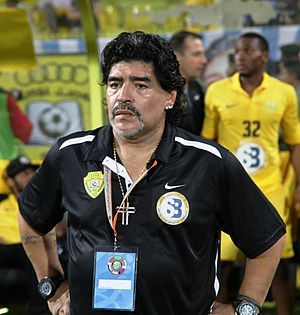

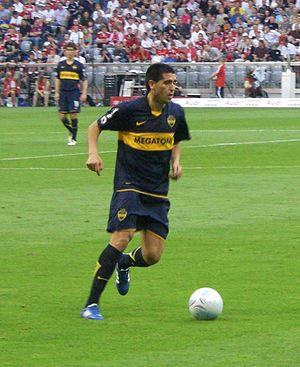

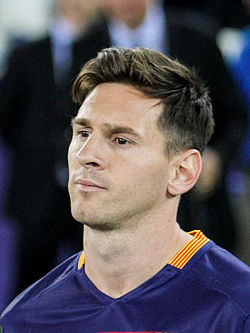

In [111]:
import asyncio
import aiohttp
from pyquery import PyQuery
from IPython.display import display, Image


async def get(url):
    with aiohttp.ClientSession() as session:
        response = await session.get(url)
        return (await response.text())

async def foto(j):
    url = 'https://es.wikipedia.org/wiki/{}'.format(j)
    page = await get(url)
    pq = PyQuery(page)
    display(Image('https:' + pq('.infobox a img:first').attr('src')))


ídolos = ['Lionel Messi', 'Roman Riquelme', 'Diego Maradona']
f = asyncio.wait([foto(i) for i in ídolos])
loop = asyncio.get_event_loop()
loop.run_until_complete(f);

## A modo de conclusiones


- Cada vez más ventajas concretas

- Cada vez menos excusas *"no está la librería Foo"*

- Python 3 es present **and future** ready

- *There should be one-- and **preferably only one** --obvious way to do it.*

### Algunos tips finales al paso

* Si sos principiante, no lo dudes
* Si inicias un proyecto nuevo, tampoco
* Si inicias una lib, evaluá el esfuerzo de la compatilidad dual. 
* Si tu producto/empresa depende de python 2.7, migrar es una inversión

### ¿Preguntas?

![](files/imgs/homer.gif)

### Es tiempo de cambiar el default

![](files/imgs/6.png)

## Chivo del final

![](files/imgs/onapsis-careers.png)


### Referencias 

http://www.snarky.ca/how-to-pitch-python-3-to-management
http://ceronman.com/2013/03/12/a-powerful-unused-feature-of-python-function-annotations/
http://asmeurer.github.io/python3-presentation/slides.html
https://compiletoi.net/fast-scraping-in-python-with-asyncio/
https://blogs.msdn.microsoft.com/pythonengineering/2016/03/08/python-3-is-winning/
http://py3readiness.org/
http://learntocodewith.me/programming/python/python-2-vs-python-3/
    